**Шепелев Д.**

# **Импорты**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from logistic_regression import LogisticRegression

# **Вспомогательные функции**

In [4]:
def drawline(p1, p2, color=None):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l

# **Генерация и обработка набора данных**

In [5]:
x1 = np.random.normal(3, 1, size=(200, 2))
x2 = np.random.normal(0, 1, size=(200, 2))
x = np.concatenate((x1, x2))
y1 = np.full((200, 1), 0)
y2 = np.full((200, 1), 1)
y = np.concatenate((y1, y2))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### **Графическое представления классифицируемых данных**

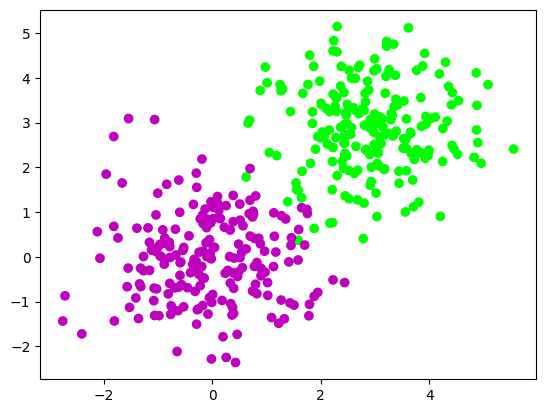

In [7]:
c = {0:'lime', 1:'m'}
plt.scatter(x[:, 0], x[:, 1], c=[c[i] for i in y[:, 0]])

# **Вычисление весовых коэффициентов разделяющей гиперплоскости $w_1\cdot x_1+w_2\cdot x_2 + b = 0$**

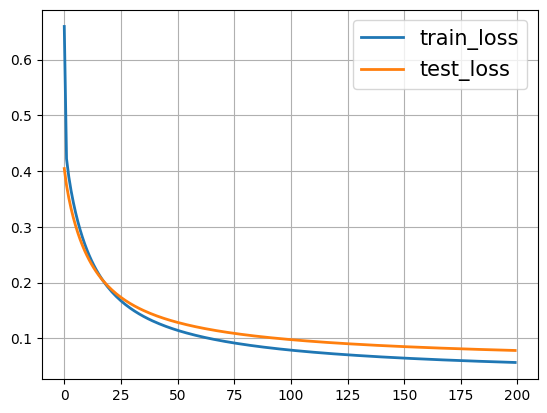

In [8]:
lr = LogisticRegression(alpha=0.5, epochs=200)
lr.fit(x_train, y_train, x_test, y_test)

plt.plot(lr.train_loss, linewidth=2, label='train_loss')
plt.plot(lr.val_loss, linewidth=2, label='test_loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

# **Визуализация результата вычисления весовых коэффициентов**

## **Разделение обучающей выборки**

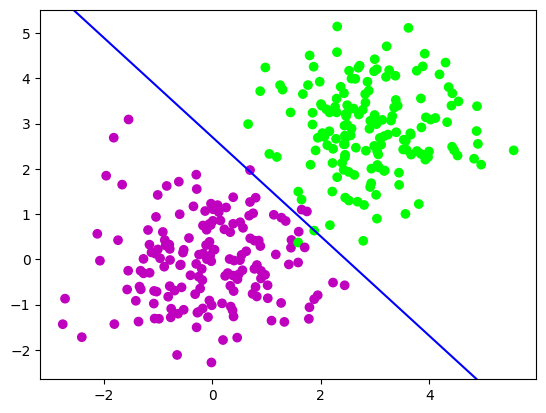

In [9]:
c = {0:'lime', 1:'m'}
plt.scatter(x_train[:,0], x_train[:,1], c=[c[y] for y in y_train[:, 0]])
drawline([0, -lr._b / lr._w[1]],[-lr._b / lr._w[0], 0], 'blue')
plt.show()

## **Проверка на тестовой выборке**

Точность классификации для тестовой выборки: 97.5%


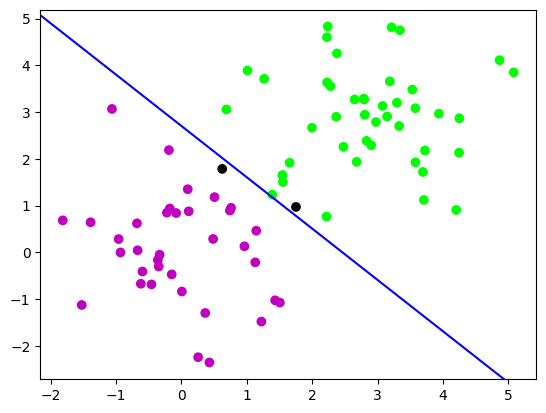

In [10]:
y_pred = lr.predict(x_test)
y_pred = y_pred.T
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred[y_pred != y_test] = -100
print(f'Точность классификации для тестовой выборки: {(len(y_pred) - (y_pred == -100).astype(int).sum()) / len(y_pred) * 100}%')

c = {0:'lime', 1:'m', -100: 'black'}

plt.scatter(x_test[:,0], x_test[:,1], c=[c[y] for y in y_pred[:, 0]])
drawline([0, -lr._b / lr._w[1]],[-lr._b / lr._w[0], 0], 'blue')
plt.show()

# **Обработка набора данных вероятности инфаркта**
Бинарная классификация: человек входит/не входит в группу риска 

## **Загрузка и обработка набора данных**

In [11]:
df = pd.read_csv("data/heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [12]:
y = df["output"].to_numpy()
y = y.reshape((y.shape[0], 1))
df = df.drop(["output"], axis=1)
x = df.to_numpy()

### **Нормализация данных**

In [13]:
x = x/np.max(x, axis=0)

### **Разделение набора на выборки**

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **Обучение**

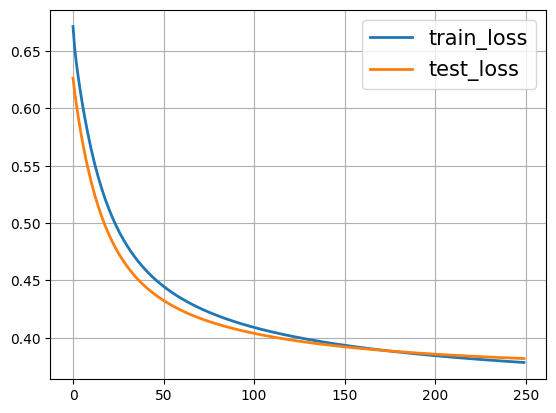

In [15]:
lr = LogisticRegression(alpha=0.5, epochs=250)
lr.fit(x_train, y_train, x_test, y_test)

plt.plot(lr.train_loss, linewidth=2, label='train_loss')
plt.plot(lr.val_loss, linewidth=2, label='test_loss')
plt.grid()
plt.legend(prop={'size': 15})
plt.show()

## **Проверка на тестовой выборке**
**Средняя точность составила ~84.25%**

In [16]:
y_pred = lr.predict(x_test)
y_pred = y_pred.T
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_pred[y_pred != y_test] = -100
print(f'Точность классификации для тестовой выборки: {(len(y_pred) - (y_pred == -100).astype(int).sum()) / len(y_pred) * 100}%')

Точность классификации для тестовой выборки: 85.24590163934425%
